1. У змінній df знаходиться датафрейм. Ваше завдання покласти в змінний df_shape рядок з інформацією, скільки ліній і стовпців він має в наступному вигляді:
'df has y rows and x columns'
де y - Число рядків, а x - Число колонок.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
taxi_url = 'https://drive.google.com/file/d/1fUHNdM_8rrXqbp0sI23JSekdfvKf-Jo2/view?usp=sharing'
taxi_path = 'https://drive.google.com/uc?id=' + taxi_url.split('/')[-2]
taxi = pd.read_csv(taxi_path, sep=';')

In [3]:
taxi.head()

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaN,iPhone,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaN,iPhone,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaN,iPhone,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0


In [4]:
taxi.shape

(23111, 19)

In [5]:
text = 'df has {} rows and {} columns'
df_shape = text.format(taxi.shape[0], taxi.shape[1])

In [6]:
df_shape

'df has 23111 rows and 19 columns'

In [7]:
df_shape1 = f'df has {taxi.shape[0]} rows and {taxi.shape[1]} columns'

In [8]:
df_shape1

'df has 23111 rows and 19 columns'

2. Покладіть у змінну na_number серію, в якій для кожної колонки вказано скільки осередків містять пропущені значення.
Наприклад, для такого датафрейму: 
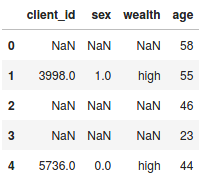

Відповідь буде:
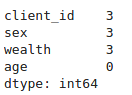

In [9]:
na_number = pd.DataFrame({'client_id': [np.nan, 3998.0, np.nan, np.nan, 5736.0] \
             ,'sex': [np.nan, 1.0, np.nan, np.nan, 0.0] \
             ,'wealth': [np.nan, 'hight', np.nan, np.nan, 'hight'] \
             ,'age': [58, 55, 46, 23, 44]  \
             })

In [10]:
na_number.isna().sum()

client_id    3
sex          3
wealth       3
age          0
dtype: int64

3. Збережіть у змінну df_types типи даних кожної колонки датафрейму df.

In [11]:
df_types = na_number.dtypes

In [12]:
df_types

client_id    float64
sex          float64
wealth        object
age            int64
dtype: object

4. Несподівано виявилося, що у змінній age значення зберігаються у вигляді рядків! Змініть тип значень на цілий у цій колонці датафрейму df.

In [13]:
na_number.astype({'age': 'float64'})

,client_id,sex,wealth,age
0,NaN,NaN,NaN,58.0
1,3998.0,1.0,hight,55.0
2,NaN,NaN,NaN,46.0
3,NaN,NaN,NaN,23.0
4,5736.0,0.0,hight,44.0


5. Як з'ясувалося, для подальшого аналізу нам не знадобляться колонки sex та age – видаліть їх з датафрейму.

In [14]:
na_number.drop(['sex','age'], axis=1, inplace=True)

In [15]:
na_number

,client_id,wealth
0,NaN,NaN
1,3998.0,hight
2,NaN,NaN
3,NaN,NaN
4,5736.0,hight


6. А тепер перевіримо, чи є в нашій таблиці df дублікати по полю client_id – драпніть усі рядки, у яких значення у колонці client_id повторюються.

In [16]:
na_number.drop_duplicates(subset=['client_id'])

,client_id,wealth
0,NaN,NaN
1,3998.0,hight
4,5736.0,hight


7. Невелика перерва на чистий пітон. У списку numbers містяться цифри. Додайте через цикл до списку positive_numbers позитивні числа з numbers. При цьому якщо вам попався 0, то потрібно припинити цей цикл.
Наприклад:
numbers = [1, -2, 3, 0, -3, 2]
Тоді positive_numbers має бути:
positive_numbers = [1, 3]

In [17]:
numbers = [1, -2, 3, 0, -3, 2]
positive_numbers = []

In [18]:
for i in numbers:
    if i > 0:
        positive_numbers.append(i)
    elif i < 0:
        continue
    elif i == 0:
        break

In [19]:
positive_numbers

[1, 3]

8. Продовжимо аналіз даних щодо поїздок. У попередньому уроці ви вивчили розподіл оцінок водіїв та клієнтів. Тепер подивимось на колонки з часом!
Збережіть дані, що знаходяться в папці (taxi_peru.csv), у змінну taxi, роздільник – ;. Потім наведіть стовпці start_at, end_at, arrived_at до формату дати, використовуючи pd.to_datetime(). Відфільтруйте дані та залиште спостереження зі статусом замовлення "asap" та "reserved" (start_type).

In [20]:
taxi[['start_at','end_at','arrived_at']] = taxi[['start_at','end_at','arrived_at']].apply(pd.to_datetime)

In [21]:
taxi = taxi.query('start_type == "asap" or start_type == "reserved"')

9. ⭐️Завдання зі зірочкою!⭐️
Створіть колонку wait_time, в якій зберігатиметься різниця між часом подачі машини (arrived_at) та часом замовлення (start_at) у хвилинах. Щоб конвертувати отриманий результат у хвилини, можна використовувати метод .astype('timedelta64[m]')

In [22]:
taxi['wait_time'] = (taxi.arrived_at - taxi.start_at).astype('timedelta64[m]')

9.1. ⭐️Завдання зі зірочкою!⭐️
Подивимося, які водії запізнювалися на замовлення до певного часу (start_type == 'reserved'). Запізненням є час очікування wait_time > 0.0.
Згрупуйте відфільтровані дані по driver_id і в якості відповіді вкажіть id водія, який спізнився на замовлення типу, що цікавить нас, найбільше число разів.

In [23]:
taxi.query('start_type == "reserved" and wait_time > 0.0') \
    .groupby(['driver_id']) \
    .agg({'taxi_id': 'count'}) \
    .rename(columns={'taxi_id': 'late_numbers'}) \
    .idxmax()

late_numbers    406921adcca37705ef527b4246c0cfea
dtype: object

In [24]:
taxi.query('start_type == "reserved" and wait_time > 0.0') \
    .driver_id \
    .value_counts() \
    .idxmax()

'406921adcca37705ef527b4246c0cfea'

10. ⭐️Завдання зі зірочкою!⭐️
Додайте стовпець month, де зберігатиметься місяць, в якому було зроблено замовлення (start_at), як номер, і стовпець weekday – назва дня тижня.

In [25]:
taxi['month'] = taxi.start_at.dt.month

In [26]:
taxi['weekday'] = taxi.start_at.dt.day_name()

In [27]:
taxi['month_name'] = taxi.start_at.dt.month_name()

In [ ]:
# taxi.start_at.dt.weekday #день недели
# taxi.start_at.dt.week #неделя с начала года
# taxi.start_at.dt.day_name() #имя дня недели
# taxi.start_at.dt.strftime('%A') #имя дня недели
# taxi.start_at.dt.month_name() #имя месяца

11. ⭐️Завдання зі зірочкою!⭐️
Побудуйте графік числа замовлень за місяцями (month). Подумайте, із чим може бути пов'язана отримана картина.
Питання: в якому літньому місяці було зроблено найменшу кількість замовлень? Як відповідь введіть номер місяця (6, 7 або 8).

In [28]:
number_of_orders = taxi.query('end_state == "drop off"') \
    .groupby(['month','month_name'], as_index=False) \
    .agg({'end_state': 'count'}) \
    .rename(columns={'end_state': 'number_of_orders'}) \
    .sort_values('month')

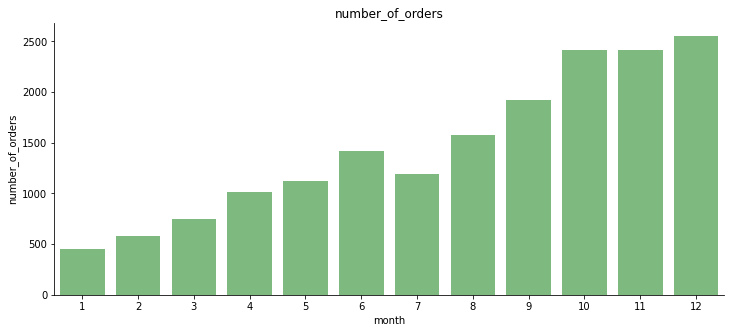

In [29]:
plt.figure(figsize=(12, 5))
sns.barplot(x='month' \
            ,y='number_of_orders' \
            ,data=number_of_orders \
            ,color='#74c476' \
           )
plt.title('number_of_orders')
sns.despine()

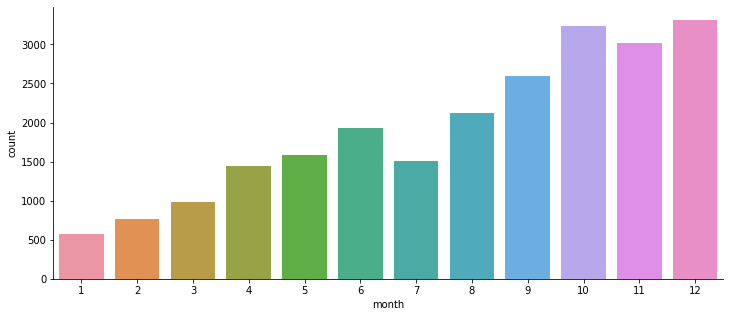

In [30]:
plt.figure(figsize=(12, 5))
sns.countplot(x=taxi.month)
sns.despine()

12. ⭐️Завдання зі зірочкою!⭐️
А тепер – графік по дня тижня (weekday). Задати порядок стовпчиків на графіку можна за допомогою аргументу order, якому потрібно передати список назв у потрібному порядку. Наприклад:
sns.countplot(data['column'], order=['One', 'Two', 'Three'])
Питання: в який день тижня сумарно надійшло найменше замовлень?

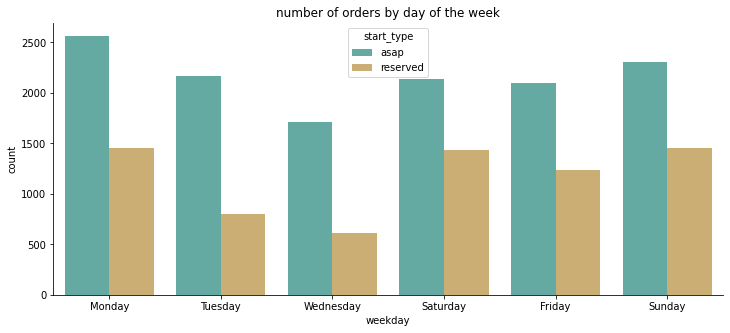

In [31]:
plt.figure(figsize=(12, 5))
sns.countplot(x='weekday',
              data=taxi,
              order=['Monday', 'Tuesday', 'Wednesday', 'Saturday', 'Friday', 'Sunday'],
              hue='start_type',
              palette=['#5ab4ac', '#d8b365'])
plt.title('number of orders by day of the week')
sns.despine()

13. ⭐️Завдання зі зірочкою!⭐️
Також ми можемо подивитися на кілька простих метрик, які показують кількість унікальних користувачів за певний період:
DAU (daily active users) – кількість унікальних користувачів за день
WAU (weekly active users) – кількість унікальних користувачів за тиждень
MAU (monthly active users) – кількість унікальних користувачів за місяць
Активні користувачі – ті, хто скористався програмою та зробив хоча б одне замовлення за вибраний проміжок часу. Побудуйте графік MAU та виберіть правильні твердження.
Можуть стати в нагоді:
groupby – угруповання
nunique – кількість унікальних значень
plot.line – лінійна діаграма

In [32]:
taxi.head()

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,...,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score,wait_time,month,weekday,month_name
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,...,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0,18.0,11,Tuesday,November
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,...,NaN,NaN,NaT,iPhone,NaN,NaN,NaN,6,Tuesday,June
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,...,NaN,NaN,NaT,iPhone,NaN,NaN,NaN,5,Monday,May
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,...,NaN,NaN,NaT,iPhone,NaN,NaN,NaN,6,Tuesday,June
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,...,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0,-5.0,9,Saturday,September


In [33]:
mau = taxi.groupby('month') \
    .agg({'user_id': pd.Series.nunique})

<AxesSubplot: xlabel='month'>

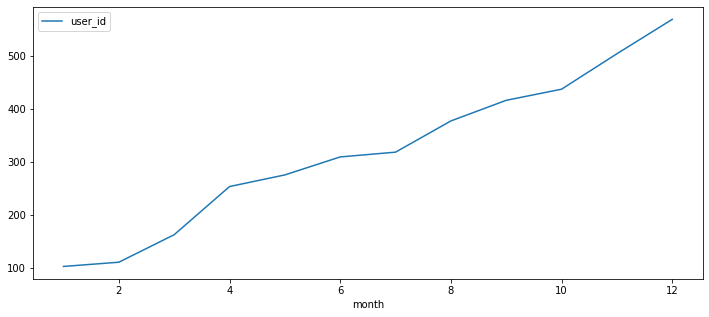

In [34]:
mau.plot(figsize=(12, 5))

In [35]:
xticks = range(1,13)

C:\Users\m.semchenko\AppData\Local\Temp\ipykernel_10148\3593417845.py:2: UserWarning: The markers list has more values (2) than needed (1), which may not be intended.
  sns.lineplot(data=mau


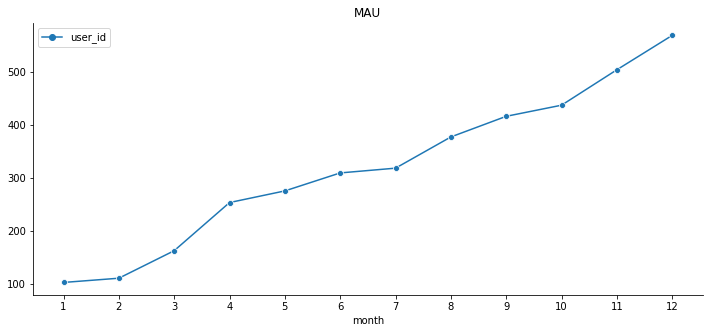

In [36]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=mau
            ,markers='o-')
plt.title('MAU')
sns.despine()
plt.xticks(xticks);